# Agenda: Visualization

1. Recap and Q&A
2. Visualization in general -- what, where, how, etc.
3. Different plot types
    - Line plots
    - Bar plots
    - Histograms
    - Pie plots
    - Scatter plots
    - Boxplots
4. What next?
    - Applying what you've learned
    - Analytics vs machine learning
5. Q&A    

# Recap 

The whole point of data analytics is to make sense of information we've gathered.  By using statistical techniques (including very simple calculations, such as mean, median, and std) we're able to understand the world, and our businesses better.  We can use that information to make better decisions going forward.

Pandas allows us to read in two-dimensional data (typically from a CSV file) into a data frame:

- Each row has an index (often numeric, but it doesn't have to be), and represents one sample, or one data point
- Each column in our data frame has a different dtype, has a column name, and represents one facet/aspect of our data

We've seen over the last few weeks that we can use a bunch of techniques to analyze this data:

- Select rows and columns matching particular criteria, and then analyze those subsets of our data
- Sort our data by index, or by values in our columns
- Join multiple data frames together, a la SQL, to combine information from different sources
- Group our data together, to get analysis per unique value in a category
- If we have text in a column, we can use the `.str` accessor to run various string-related methods
- If we have dates and times in a column, we can use the `.dt` accessor to run various date-related methods.
- We can even perform date arithmetic, retrieving "time delta" values, so that we can look at the amount of time that has been spent doing an activity.


# Plotting and visualization

Plotting has (at least) two purposes:

1. To make our data accessible to people who don't have the time or inclination to read through long sets of numbers and make sense of them.  As people, we register images very quickly, and understand their meanings very quickly.
2. You can get insights as to your data from the chart.  Humans are very good at identifying patterns, and we can often see a pattern in a chart, and then apply that insight back to our data.

# How do we plot?

In the Python world, the 900-pound gorilla of plotting is known as "Matplotlib." The good news is that Matplotlib can create any kind of plot you want, in any combination, with any colors, with any styles.

The bad news is that Matplotlib is HORRIBLY COMPLEX to learn. And to use. And to remember.

My preference (and what we'll do in this course) is to use a shell around Matplotlib, making it perhaps slightly less powerful, but much easier to use. The wrapper around Matplotlib that I like to use is ... Pandas!

If we plot things via Pandas, Pandas will translate our requests into Matplotlib's requirements, and will give us fully formed Matplotlib plots! 

There are some other wrappers around Matplotlib, and one of them is known as Seaborn, which is very impressive.

In [1]:
# in order for us to plot, we'll need load some things

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
s = Series(np.random.randint(0, 100, 10), 
          index=list('abcdefghij'))


In [3]:
s

a    22
b     7
c    79
d    42
e    84
f     3
g    44
h    38
i    35
j    10
dtype: int64

<AxesSubplot:>

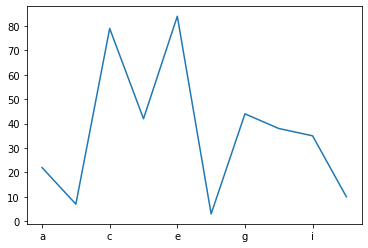

In [4]:
# I can turn this into a "line plot" with a simple command:

s.plot.line()

# Things to note

1. The plot appears inside of Jupyter. Earlier versions of Matplotlib (or Jupyter) required that you set something, or import something, for this to work.  Now it works out of the box.
2. The x axis reflects our index, and even shows every other value of the index.
3. The y axis reflects our values, and is automatically scaled to show from 0 through the top value we need.
4. The color, size, and other decorations are very plain -- we'll soon see how we can change these.

In [5]:
!head ../data/boston,ma.csv

date_time,"boston,ma_maxtempC","boston,ma_mintempC","boston,ma_totalSnow_cm","boston,ma_sunHour","boston,ma_uvIndex","boston,ma_uvIndex","boston,ma_moon_illumination","boston,ma_moonrise","boston,ma_moonset","boston,ma_sunrise","boston,ma_sunset","boston,ma_DewPointC","boston,ma_FeelsLikeC","boston,ma_HeatIndexC","boston,ma_WindChillC","boston,ma_WindGustKmph","boston,ma_cloudcover","boston,ma_humidity","boston,ma_precipMM","boston,ma_pressure","boston,ma_tempC","boston,ma_visibility","boston,ma_winddirDegree","boston,ma_windspeedKmph"
2018-12-11 00:00:00,1,-4,0.0,8.7,2,0,21,10:19 AM,08:12 PM,07:03 AM,04:11 PM,-7,-3,0,-3,10,0,57,0.0,1022,-3,10,339,8
2018-12-11 03:00:00,1,-4,0.0,8.7,2,0,21,10:19 AM,08:12 PM,07:03 AM,04:11 PM,-7,-1,1,-1,7,2,57,0.0,1023,-3,10,319,6
2018-12-11 06:00:00,1,-4,0.0,8.7,2,0,21,10:19 AM,08:12 PM,07:03 AM,04:11 PM,-9,-5,-3,-5,8,4,60,0.0,1023,-4,10,334,7
2018-12-11 09:00:00,1,-4,0.0,8.7,2,2,21,10:19 AM,08:12 PM,07:03 AM,04:11 PM,-9,1,1,1,3,6,49,0.0,1022,-1,10,334,

# Exercise: Plotting Boston winter

1. Read `boston,ma.csv` file into a data frame. We're only interested in three columns -- `boston,ma_mintempC`, `boston,ma_maxtempC` and `boston,ma_totalSnow_cm`.
2. Create a line plot for the min-temp column.

In the zipfile (https://files.lerner.co.il/pandas-workout-data.zip), you should find this file (among others).

In [8]:
df = pd.read_csv('boston,ma.csv',
                usecols=['boston,ma_maxtempC', 
                        'boston,ma_mintempC',
                        'boston,ma_totalSnow_cm'])
df.head()

,"boston,ma_maxtempC","boston,ma_mintempC","boston,ma_totalSnow_cm"
0,1,-4,0.0
1,1,-4,0.0
2,1,-4,0.0
3,1,-4,0.0
4,1,-4,0.0


In [9]:
df.shape

(728, 3)

In [10]:
df.dtypes

boston,ma_maxtempC          int64
boston,ma_mintempC          int64
boston,ma_totalSnow_cm    float64
dtype: object

<AxesSubplot:>

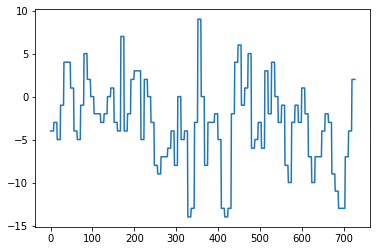

In [12]:
# let's create a line plot for min temp
df['boston,ma_mintempC'].plot.line()

In [13]:
df = pd.read_csv('boston,ma.csv',
                usecols=['date_time','boston,ma_maxtempC', 
                        'boston,ma_mintempC',
                        'boston,ma_totalSnow_cm'],
                parse_dates=['date_time'],
                index_col='date_time')
df.head()

,"boston,ma_maxtempC","boston,ma_mintempC","boston,ma_totalSnow_cm"
date_time,,,
2018-12-11 00:00:00,1,-4,0.0
2018-12-11 03:00:00,1,-4,0.0
2018-12-11 06:00:00,1,-4,0.0
2018-12-11 09:00:00,1,-4,0.0
2018-12-11 12:00:00,1,-4,0.0


<AxesSubplot:xlabel='date_time'>

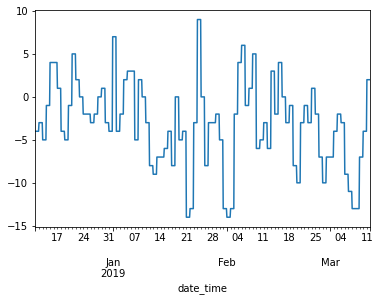

In [14]:
df['boston,ma_mintempC'].plot.line()

<AxesSubplot:title={'center':'Boston in the winter'}, xlabel='date_time'>

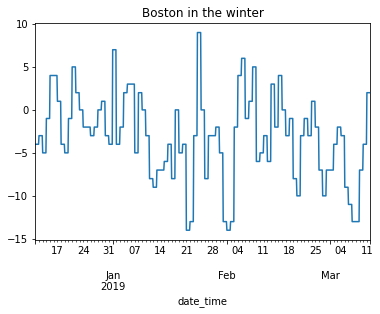

In [15]:
# let's make our plot even snazzier
# first: let's add a title

df['boston,ma_mintempC'].plot.line(title='Boston in the winter')

<AxesSubplot:title={'center':'Boston in the winter'}, xlabel='date_time'>

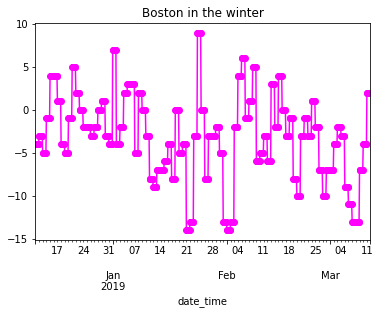

In [31]:
df['boston,ma_mintempC'].plot.line(title='Boston in the winter',
                                  color='#ff00ff',   # full red, 0 green, full blue == full purple
                                  style='-o')        # use lines (-), and mark data with circles (o)

<AxesSubplot:title={'center':'Boston in the winter'}, xlabel='date_time'>

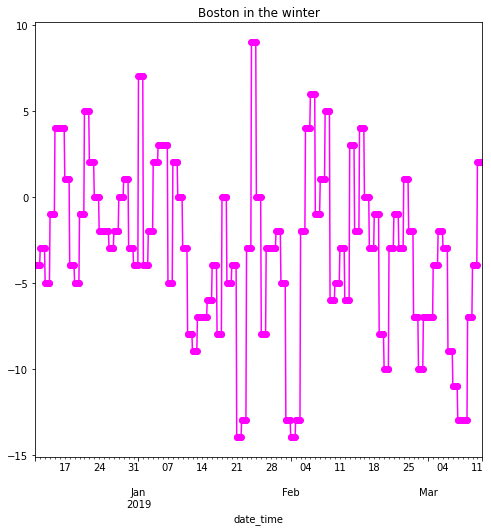

In [32]:
df['boston,ma_mintempC'].plot.line(title='Boston in the winter',
                                  color='#ff00ff',   # full red, 0 green, full blue == full purple
                                  style='-o',        # use lines (-), and mark data with circles (o)
                                figsize=(8,8))

In [33]:
# what if I want to plot more than one column?

# remember that nearly any method that can be invoked on a series can also be invoked on a data frame
# when we do this, we get a result for each of the columns in the data frame

In [34]:
df['boston,ma_mintempC'].mean()   # mean temperature on a single column

-3.142857142857143

In [35]:
df.mean()

boston,ma_maxtempC        2.868132
boston,ma_mintempC       -3.142857
boston,ma_totalSnow_cm    0.826374
dtype: float64

In [38]:
df.columns = ['max', 'min', 'snow']

<AxesSubplot:xlabel='date_time'>

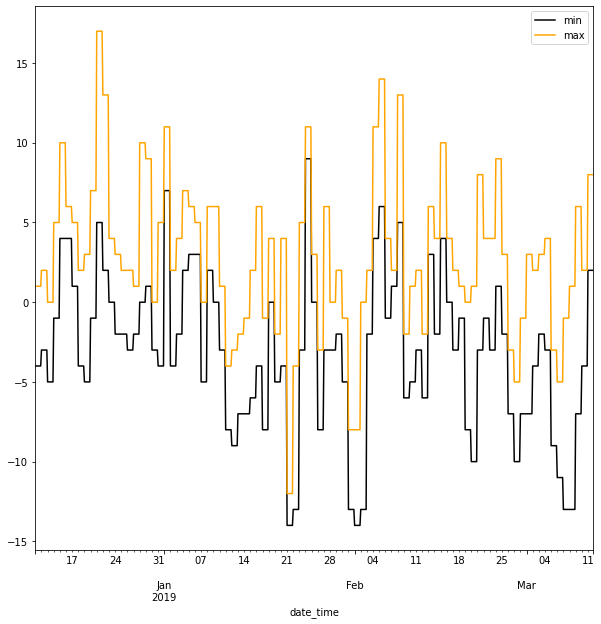

In [45]:
df[['min', 'max']].plot.line(figsize=(10,10),
                            color=['black', 'orange'])

array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>],
      dtype=object)

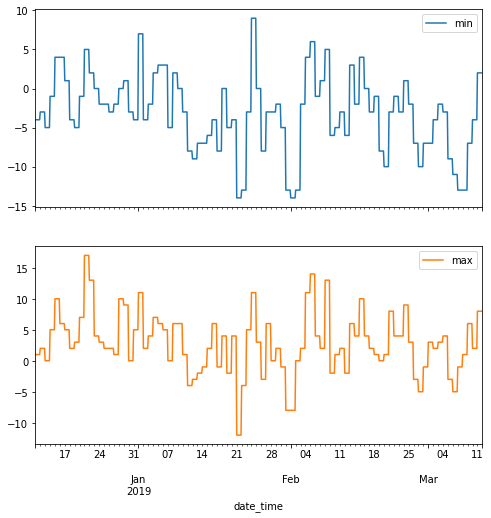

In [47]:
# sometimes, you want to plot columns alongside one another, but you don't want them
# in the same plot.

# for this, we have "subplots"

df[['min', 'max']].plot.line(subplots=True, figsize=(8,8))

# Exercise: More Boston winter plots

1. Plot min, max, and snow all on the same plot. Min should be in blue, max should be in red, and snow should be in gray.  Make sure that there is a title for the plot.
2. Replot these, but in several subplots.

<AxesSubplot:xlabel='date_time'>

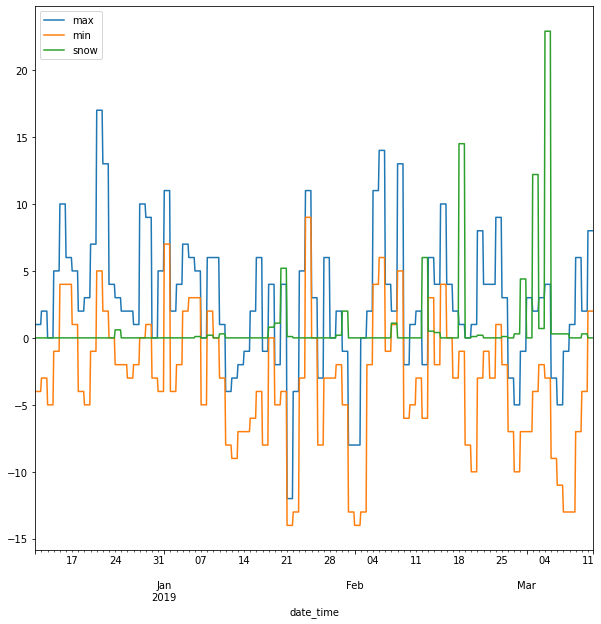

In [50]:
df.plot.line(figsize=(10,10),
            color=['b'])